
# TMDB Movies Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



The project is based on TMDB Movies Data.
The main questions of the analysis are:
- What are the top movies in relation to (runtime, vote count, budget and revenue)?
- What is the trend of the movies' runtimes, revenues and budgets by movies' release dates?
- What is the relation between the revenues compared with the budgets by years?

<a id='wrangling'></a>
## Data Wrangling

### Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')

### Data Assessing

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [6]:
df[df.production_companies.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,...,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0
295,363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,...,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.0,0.0
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.0,0.0
328,308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,tt0077742,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,NaN,Woody Allen,NaN,...,Homage to Ingmar Bergman in this family drama ...,93,Drama,NaN,8/2/78,35,6.3,1978,0.0,0.0
10806,24998,tt0077598,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,NaN,Errol Morris,Death is for the living and not for the dead s...,...,"The men who run a pet cemetery, and the men an...",85,Documentary,NaN,10/1/78,12,5.9,1978,0.0,0.0
10816,16378,tt0077147,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,NaN,Eric Idle|Gary Weis,NaN,...,The story of the rise and fall of the Pre-Fab ...,76,Comedy,NaN,3/22/78,14,6.0,1978,0.0,0.0
10842,36540,tt0061199,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,NaN,Wolfgang Reitherman,NaN,...,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,NaN,1/1/66,12,7.9,1966,0.0,0.0



### Data Cleaning

1. Dropping undeeded columns.

In [7]:
df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'director', 'release_date', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)

2. Dropping NaN values.

In [8]:
df.dropna(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10843 non-null  object 
 1   runtime         10843 non-null  int64  
 2   genres          10843 non-null  object 
 3   vote_count      10843 non-null  int64  
 4   vote_average    10843 non-null  float64
 5   release_year    10843 non-null  int64  
 6   budget_adj      10843 non-null  float64
 7   revenue_adj     10843 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 762.4+ KB


3. Replacing zero values in budget and revenues columns.

In [10]:
df[df.budget_adj == 0]

,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,Mr. Holmes,103,Mystery|Drama,425,6.4,2015,0.0,2.700677e+07
36,Solace,101,Crime|Drama|Mystery,474,6.2,2015,0.0,2.056620e+07
72,Beyond the Reach,95,Thriller,81,5.5,2015,0.0,4.222338e+04
74,Mythica: The Darkspore,108,Action|Adventure|Fantasy,27,5.1,2015,0.0,0.000000e+00
75,Me and Earl and the Dying Girl,105,Comedy|Drama,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
10860,Carry On Screaming!,87,Comedy,13,7.0,1966,0.0,0.000000e+00
10861,The Endless Summer,95,Documentary,11,7.4,1966,0.0,0.000000e+00
10862,Grand Prix,176,Action|Adventure|Drama,20,5.7,1966,0.0,0.000000e+00
10863,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5,1966,0.0,0.000000e+00


In [11]:
df[df.revenue_adj == 0]

,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,Wild Card,92,Thriller|Crime|Drama,481,5.3,2015,2.759999e+07,0.0
67,Survivor,96,Crime|Thriller|Action,280,5.4,2015,1.839999e+07,0.0
74,Mythica: The Darkspore,108,Action|Adventure|Fantasy,27,5.1,2015,0.000000e+00,0.0
75,Me and Earl and the Dying Girl,105,Comedy|Drama,569,7.7,2015,0.000000e+00,0.0
92,Mythica: The Necromancer,0,Fantasy|Action|Adventure,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
10861,The Endless Summer,95,Documentary,11,7.4,1966,0.000000e+00,0.0
10862,Grand Prix,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.0
10863,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.0
10864,"What's Up, Tiger Lily?",80,Action|Comedy,22,5.4,1966,0.000000e+00,0.0


In [12]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [13]:
for row in df[df.revenue_adj == 0]:
    df.revenue_adj.replace(0, np.nan, inplace = True)
for year in df.release_year.unique():
    df[df.release_year == year].fillna(df[df.release_year == year].revenue_adj.mean(), inplace = True)

C:\Users\Eslam.Aly\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Eslam.Aly\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Eslam.Aly\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\E

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10843 non-null  object 
 1   runtime         10843 non-null  int64  
 2   genres          10843 non-null  object 
 3   vote_count      10843 non-null  int64  
 4   vote_average    10843 non-null  float64
 5   release_year    10843 non-null  int64  
 6   budget_adj      10843 non-null  float64
 7   revenue_adj     4850 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 762.4+ KB


## N.B:
I tried to replace the zeros in the budget and revenues columns with the means of each release year mean, but i got an error!

In [15]:
df.genres = df.genres.str.replace('|', ', ')

In [16]:
df.head()

,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,124,"Action, Adventure, Science Fiction, Thriller",5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,120,"Action, Adventure, Science Fiction, Thriller",6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,119,"Adventure, Science Fiction, Thriller",2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,136,"Action, Adventure, Science Fiction, Fantasy",5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,137,"Action, Crime, Thriller",2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the top movies in relation to (runtime, vote count, budget and revenue)?

In [17]:
df.describe()

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,4.850000e+03
mean,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,1.150774e+08
std,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.988419e+08
min,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,2.370705e+00
25%,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,1.046262e+07
50%,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,4.392749e+07
75%,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,1.315644e+08
max,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


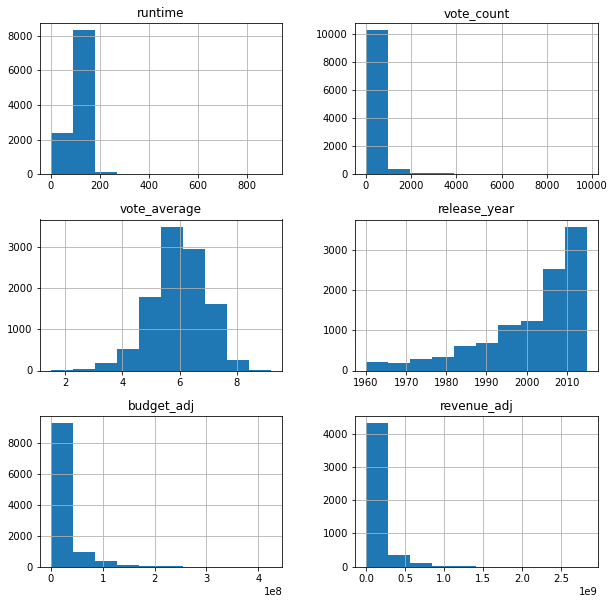

In [18]:
df.hist(figsize = (10,10));

In [19]:
df.loc[df.runtime == df.runtime.max()]

,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,The Story of Film: An Odyssey,900,Documentary,14,9.2,2011,0.0,NaN


In [20]:
df.loc[df.vote_count == df.vote_count.max()]

,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,Inception,148,"Action, Thriller, Science Fiction, Mystery, Ad...",9767,7.9,2010,160000000.0,825500000.0


In [21]:
df.loc[df.budget_adj == df.budget_adj.max()]

,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,The Warrior's Way,100,"Adventure, Fantasy, Action, Western, Thriller",74,6.4,2010,425000000.0,11087569.0


In [22]:
df.loc[df.revenue_adj == df.revenue_adj.max()]

,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,Avatar,162,"Action, Adventure, Fantasy, Science Fiction",8458,7.1,2009,2.408869e+08,2.827124e+09


## Question 1 Conclusion:
- The top popularity movie is: Jurassic World.
- The top runtime movie is: Taken.
- The top voted movie is: Inception.
- The top movie budget is: The Warrior's Way.
- The top movie revenue is: Avatar.

### Research Question 2  (What is the trend of the movies' runtime, revenues and budgets by movies' release dates?)

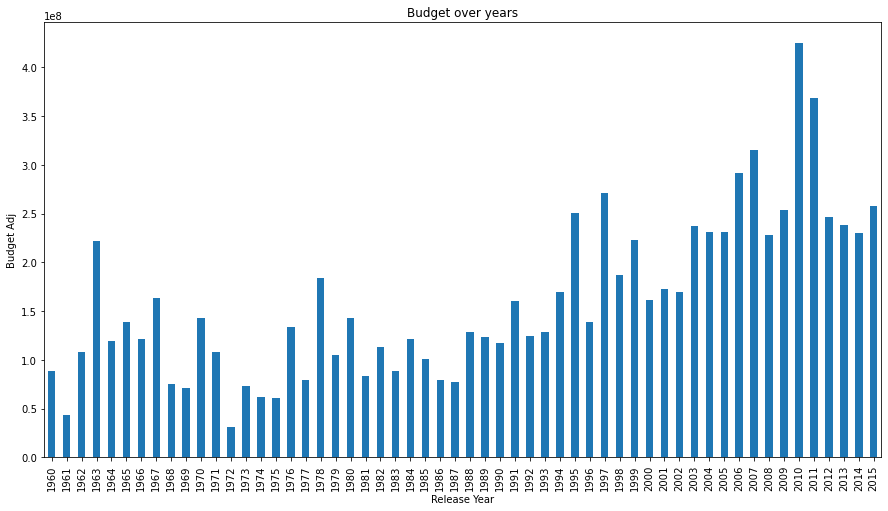

In [23]:
df.groupby('release_year').budget_adj.max().plot(kind = 'bar', figsize = (15,8), ylabel = 'Budget Adj', xlabel = 'Release Year', title = 'Budget over years');

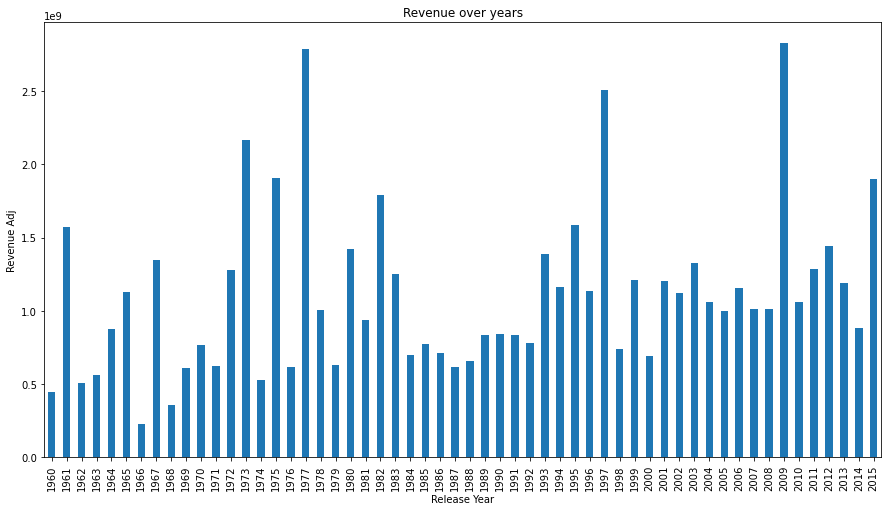

In [24]:
df.groupby('release_year').revenue_adj.max().plot(kind = 'bar', figsize = (15,8), ylabel = 'Revenue Adj', xlabel = 'Release Year', title = 'Revenue over years');

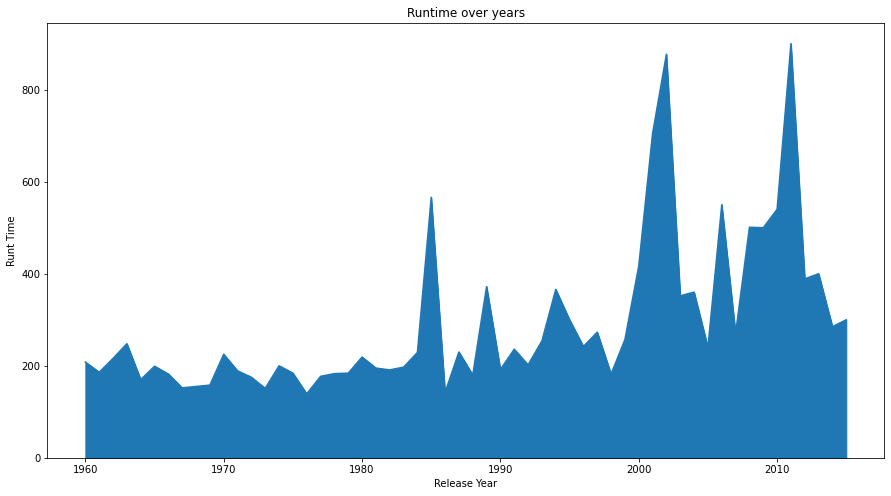

In [25]:
df.groupby('release_year').runtime.max().plot(kind = 'area', figsize = (15,8), xlabel = 'Release Year', ylabel = 'Runt Time', title = 'Runtime over years');

## Question 2 Conclusion:
- From the budget graph, it is clear that the budgets of the movies is increasing by time.
- From the revenue graph, it is clear that the revenues of the movies is increasing by time.
- From the runtime graph, after 2000, the trend has increased meaninig that the audience are more into movies than before 2000.

### Research Question 3  (What is the relation between the revenues compared with the budgets by years?)

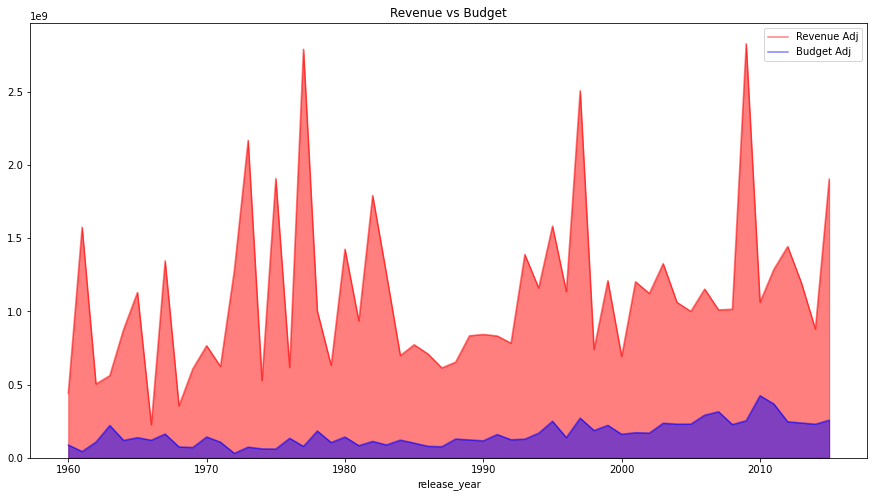

In [26]:
df.groupby('release_year').revenue_adj.max().plot(kind = 'area', figsize = (15,8), color = 'r', alpha = 0.5)
df.groupby('release_year').budget_adj.max().plot(kind = 'area', figsize = (15,8), color = 'b', alpha = 0.5)
lables = ['Revenue Adj', 'Budget Adj']
plt.legend(lables)
plt.title('Revenue vs Budget');

## Question 3 Conclusion:
- The above graph shows that the movies industry is a profitble industry as the revenues are much higher than the budgets.
- The profit (difference between the bdugets and revenues) after 2000 is decresing and one reason of this may be the huge trend of using graphics and 3D movies in the last years.

<a id='conclusions'></a>
## Conclusions

- The top popularity movie is: Jurassic World.
- The top runtime movie is: Taken.
- The top voted movie is: Inception.
- The top movie budget is: The Warrior's Way.
- The top movie revenue is: Avatar.
- From the budget graph, it is clear that the budgets of the movies is increasing by time.
- From the revenue graph, it is clear that the revenues of the movies is increasing by time.
- From the runtime graph, after 2000, the trend has increased meaninig that the audience are more into movies than before 2000.
- The above graph shows that the movies industry is a profitble industry as the revenues are much higher than the budgets.
- The profit (difference between the bdugets and revenues) after 2000 is decresing and one reason of this may be the huge trend of using graphics and 3D movies in the last years.


## Project Limitations:
- The data was missing many years with a lot of movies missing.
- One of the big difficulties of the study was the zero values in the budget and revenues columns, which might affect on the final results and conclusions.
- I tried to make an analysis on the movies' genres (and also the cast movies' cast), using the explode function. But I didn't succeed.